# <font color= blue> <b> TAREA PROGRAMACIÓN ORIENTADA A OBJETOS </b> </i> </font> 

1. Consiga el conjunto de datos iris.csv.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar los datos de Iris
iris = load_iris()

# Crear un DataFrame de pandas con los datos
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Mostrar las primeras filas del DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
estadisticas = pd.DataFrame(columns=['Variable', 'Media', 'Q25', 'Mediana','Q75', 'Desviacion'])

In [4]:
variable = "sepal length (cm)"
estadisticas.append({'Variable': variable, 
                          'Media':df['{}'.format(variable)].mean(),
                          'Q25':df['{}'.format(variable)].quantile(0.25),
                          'Mediana':df['{}'.format(variable)].quantile(0.5),
                          'Q75':df['{}'.format(variable)].quantile(0.75), 
                          'Desviacion':df['{}'.format(variable)].std()}, ignore_index=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\1011771301.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estadisticas.append({'Variable': variable,


,Variable,Media,Q25,Mediana,Q75,Desviacion
0,sepal length (cm),5.843333,5.1,5.8,6.4,0.828066


3. Escriba una clase con las siguientes funcionalidades:
   3.1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
   
   3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables.
   
   3.3 Implemente un método que entregue los nombre de las variables disponibles.
   
   3.3 Implemente un método que reciba el nombre de una variable disponible dentro del objeto ( en el  dataframe) y regrese: sus estadísticas básicas:  media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.


In [5]:
import matplotlib.pyplot as plt

In [28]:
class LeerBase:
    """
    Clase para leer un archivo de datos y lo guarde en un dataframe de pandas.
    Mostrará los nombres de las variables disponibles y calculará sus estadísticas 
    descriptivas junto con histogramas.
    También mostrará dos filas de datos cada vez que se llame al objeto.
    """
    def __init__(self, Datafr):
        self.Datafr = pd.DataFrame(Datafr)
        self.nombres = self.Datafr.columns
        
        self.filas = self.Datafr.shape[0]
        self.llamadas = 0
        
    def __call__(self):
        if (self.llamadas+1) > self.filas:
            raise ValueError("Ya no hay más datos")
        else:
            mostrar = self.Datafr.iloc[self.llamadas:(self.llamadas+2),]
            self.llamadas += 1
        print(mostrar)
        
    def columnas(self):
        print("Las variables disponibles son:")
        for i in range(len(self.nombres)):
            print(self.nombres[i])
        
    def descriptiva(self):
        self.Estadisticas = pd.DataFrame(columns=['Variable', 'Media', 'Q25', 'Mediana','Q75', 'Desviacion'])
        for i in range(len(self.nombres)):
            variable = self.nombres[i]
            nueva_fila = {'Variable': variable, 
                             'Media':self.Datafr['{}'.format(variable)].mean(),
                             'Q25':self.Datafr['{}'.format(variable)].quantile(0.25),
                             'Mediana':self.Datafr['{}'.format(variable)].quantile(0.5),
                             'Q75':self.Datafr['{}'.format(variable)].quantile(0.75), 
                             'Desviacion':self.Datafr['{}'.format(variable)].std()}
            self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
        return(self.Estadisticas)
        
    def histograma(self, variable_hist):
        resultado = self.descriptiva()
        seleccion = resultado[resultado["Variable"].isin([variable_hist])]
        print("Las estadísticas descriptivas son:")
        print(seleccion)
        print()
        print("El histograma de la variable '{}' es:".format(variable_hist))
        self.Datafr['{}'.format(variable_hist)].hist()
        plt.show()
        

In [29]:
Iris = LeerBase(df)
type(Iris)

__main__.LeerBase

- Método que calcula las estadísticas descriptivas de cada una de las variables.

In [22]:
Iris.descriptiva()

C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\1809761622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\1809761622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\1809761622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\1809761622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

,Variable,Media,Q25,Mediana,Q75,Desviacion
0,sepal length (cm),5.843333,5.1,5.80,6.4,0.828066
1,sepal width (cm),3.057333,2.8,3.00,3.3,0.435866
2,petal length (cm),3.758000,1.6,4.35,5.1,1.765298
3,petal width (cm),1.199333,0.3,1.30,1.8,0.762238


- Método que muestra los nombres de las variables disponibles

In [23]:
Iris.columnas()

Las variables disponibles son:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


- Método que recibe el nombre de una de las variables y devuelve sus estadísticas junto a al histograma respectivo de la distribución de la variable.

Las estadísticas descriptivas son:
            Variable  Media  Q25  Mediana  Q75  Desviacion
2  petal length (cm)  3.758  1.6     4.35  5.1    1.765298

El histograma de la variable 'petal length (cm)' es:


C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\776819527.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\776819527.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\776819527.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Estadisticas = self.Estadisticas.append(nueva_fila, ignore_index=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_10508\776819527.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

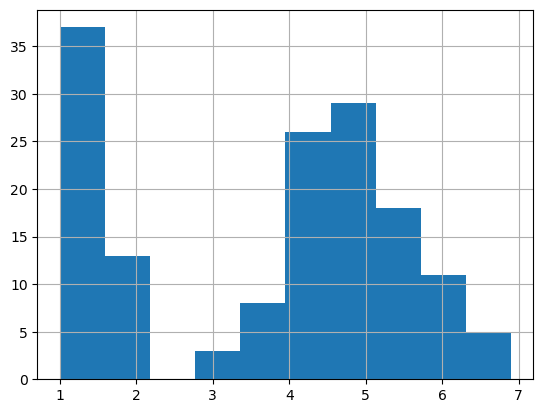

In [31]:
Iris.histograma("petal length (cm)")